In [170]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [171]:
### single-cell eQTL effects

In [172]:
filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/data/pipeline_snakemakes/output_structlmm_alldays_10PCs/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

ENSG00000176125_UFSP1-7_100492322_C_T  \
21843_1#99                               -0.092291   
24229_5#47                               -0.094179   
25535_2#136                              -0.080449   
23794_1#233                              -0.091711   
25475_3#27                               -0.089183   

             ENSG00000175106_TVP23C-17_15478507_G_C  \
21843_1#99                                -0.020901   
24229_5#47                                -0.418200   
25535_2#136                               -0.044425   
23794_1#233                               -0.042417   
25475_3#27                                -0.029810   

             ENSG00000147677_EIF3H-8_117688031_G_A  \
21843_1#99                               -0.054118   
24229_5#47                                0.039307   
25535_2#136                              -0.047899   
23794_1#233                              -0.120662   
25475_3#27                               -0.100041   

             ENSG00000204389_HSPA1A-6_31761865_T_C  \
21843_1#99                               -0.617919   
24229_5#47                               -1.340217   
25535_2#136                              -0.879945   
23794_1#233                              -0.429285   
25475_3#27                               -0.405588   

             ENSG00000204389_HSPA1A-6_31785228_G_C  \
21843_1#99                               -0.654549   
24229_5#47                               -1.205610   
25535_2#136                              -0.889774   
23794_1#233                              -0.449291   
25475_3#27                               -0.401307   

             ENSG00000116731_PRDM2-1_14235022_G_A  \
21843_1#99                              -0.013270   
24229_5#47                              -0.028206   
25535_2#136                              0.008512   
23794_1#233                             -0.049670   
25475_3#27                              -0.033448   

             ENSG00000203485_INF2-14_105216381_C_T  \
21843_1#99                               -0.185045   
24229_5#47                               -0.306860   
25535_2#136                              -0.163487   
23794_1#233                              -0.173315   
25475_3#27                               -0.225870   

             ENSG00000091317_CMTM6-3_32523777_T_C  \
21843_1#99                               0.150489   
24229_5#47                               0.050959   
25535_2#136                              0.146643   
23794_1#233                              0.185699   
25475_3#27                               0.170078   

             ENSG00000126524_SBDS-7_66440718_A_G  \
21843_1#99                             -0.064830   
24229_5#47                             -0.089726   
25535_2#136                            -0.030945   
23794_1#233                            -0.005271   
25475_3#27                             -0.069707   

             ENSG00000144134_RABL2A-2_114406459_G_A  ...  \
21843_1#99                                 0.041793  ...   
24229_5#47                                 0.208231  ...   
25535_2#136                                0.042243  ...   
23794_1#233                                0.036158  ...   
25475_3#27                                 0.007676  ...   

             ENSG00000206535_LNP1-3_100055273_G_A  \
21843_1#99                              -0.039099   
24229_5#47                              -0.061028   
25535_2#136                             -0.106094   
23794_1#233                             -0.139418   
25475_3#27                              -0.225352   

             ENSG00000206535_LNP1-3_100060779_C_T  \
21843_1#99                              -0.142666   
24229_5#47                              -0.100131   
25535_2#136                             -0.148331   
23794_1#233                             -0.191834   
25475_3#27                              -0.196503   

             ENSG00000206535_LNP1-3_100181999_G_T  \
21843_1#99                              -0.091894   
2

In [173]:
### PC coordinates

In [174]:
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/10pcs_500hvgs.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
df_pcs.index

Index(['21843_1#10', '21843_1#100', '21843_1#101', '21843_1#102',
       '21843_1#103', '21843_1#105', '21843_1#106', '21843_1#107',
       '21843_1#108', '21843_1#109',
       ...
       '24539_8#88', '24539_8#89', '24539_8#90', '24539_8#91', '24539_8#92',
       '24539_8#93', '24539_8#94', '24539_8#95', '24539_8#97', '24539_8#98'],
      dtype='object', length=36044)

In [175]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [176]:
all_cells = df_pcs.index.values

In [177]:
# ceil(len(all_cells)*0.1)

In [178]:
all_cells

array(['21843_1#10', '21843_1#100', '21843_1#101', ..., '24539_8#95',
       '24539_8#97', '24539_8#98'], dtype=object)

In [179]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*0.1))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [180]:
df = df[df.index.isin(cells)]
df.shape

(3363, 4062)

In [181]:
# take absolute values and scale
df = df.abs()
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [182]:
df = df.loc[:, (df != 0).any(axis=0)]

In [183]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(3363, 10)

In [184]:
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [185]:
df.head()

ENSG00000176125_UFSP1-7_100492322_C_T  \
21241_6#103                               0.575870   
21241_6#106                               0.586552   
21241_6#112                               0.599708   
21241_6#115                               0.312410   
21241_6#117                               0.146224   

             ENSG00000175106_TVP23C-17_15478507_G_C  \
21241_6#103                                0.721945   
21241_6#106                                0.407897   
21241_6#112                                0.527575   
21241_6#115                                0.510507   
21241_6#117                                0.089844   

             ENSG00000147677_EIF3H-8_117688031_G_A  \
21241_6#103                               0.202750   
21241_6#106                               0.065101   
21241_6#112                               0.058640   
21241_6#115                               0.012429   
21241_6#117                               0.002131   

             ENSG00000204389_HSPA1A-6_31761865_T_C  \
21241_6#103                               0.596353   
21241_6#106                               0.824422   
21241_6#112                               0.848298   
21241_6#115                               0.879966   
21241_6#117                               0.373510   

             ENSG00000204389_HSPA1A-6_31785228_G_C  \
21241_6#103                               0.602617   
21241_6#106                               0.875990   
21241_6#112                               0.887071   
21241_6#115                               0.905719   
21241_6#117                               0.410808   

             ENSG00000116731_PRDM2-1_14235022_G_A  \
21241_6#103                              0.147962   
21241_6#106                              0.077653   
21241_6#112                              0.095139   
21241_6#115                              0.167240   
21241_6#117                              0.010658   

             ENSG00000203485_INF2-14_105216381_C_T  \
21241_6#103                               0.471854   
21241_6#106                               0.631803   
21241_6#112                               0.698505   
21241_6#115                               0.725037   
21241_6#117                               0.215065   

             ENSG00000091317_CMTM6-3_32523777_T_C  \
21241_6#103                              0.703036   
21241_6#106                              0.487611   
21241_6#112                              0.521271   
21241_6#115                              0.414238   
21241_6#117                              0.594516   

             ENSG00000126524_SBDS-7_66440718_A_G  \
21241_6#103                             0.233348   
21241_6#106                             0.163688   
21241_6#112                             0.294284   
21241_6#115                             0.010292   
21241_6#117                             0.492804   

             ENSG00000144134_RABL2A-2_114406459_G_A  ...  \
21241_6#103                                0.507122  ...   
21241_6#106                                0.448052  ...   
21241_6#112                                0.464454  ...   
21241_6#115                                0.174727  ...   
21241_6#117                                0.025565  ...   

             ENSG00000206535_LNP1-3_100055273_G_A  \
21241_6#103                              0.463585   
21241_6#106                              0.306288   
21241_6#112                              0.432784   
21241_6#115                              0.458845   
21241_6#117                              0.286228   

             ENSG00000206535_LNP1-3_100060779_C_T  \
21241_6#103                              0.852088   
21241_6#106                              0.753254   
21241_6#112                              0.856697   
21241_6#115                              0.844576   
21241_6#117                              0.901447   

             ENSG00000206535_LNP1-3_100181999_G_T  \
21241_6#103                              0.785681   
2

In [186]:
df_pcs.head()

PC1        PC2        PC3        PC4        PC5        PC6  \
21241_6#103  31.063225   9.701125  12.602948  -9.719614 -12.252897  -5.496166   
21241_6#106  19.343240   8.811335  -8.926351 -14.040313  -8.786612  -6.998393   
21241_6#112  28.093589  11.662324  -3.652820  -9.912350  -9.283901  -8.581900   
21241_6#115  27.419158  -2.675038   1.188672 -17.192127   4.196975  -5.373420   
21241_6#117  18.657056   6.678943  -4.186063 -33.736183   0.901118 -11.403034   

                   PC7        PC8        PC9      PC10  
21241_6#103  -2.239845   3.811890   0.578312  3.418790  
21241_6#106  -9.144738  10.619957  -0.392386  8.341480  
21241_6#112  -9.770208  13.643082   3.278502  6.675054  
21241_6#115 -13.710290  -0.324198   7.108044  2.157800  
21241_6#117   9.446825   3.069251  11.755395  1.700101

In [187]:
# df.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/effect_sizes_clustering/scaled_absolute_old_eff_sizes_10pcs_as_spatial_downsample_10pct.csv")
# df_pcs.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/effect_sizes_clustering/scaled_absolute_old_eff_sizes_10pcs_as_spatial_downsample_10pct_pcs.csv")

In [188]:
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

3363

In [189]:
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

4059

In [190]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [191]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 3363 × 4059

In [192]:
df_pcs.head()

PC1        PC2        PC3        PC4        PC5        PC6  \
21241_6#103  31.063225   9.701125  12.602948  -9.719614 -12.252897  -5.496166   
21241_6#106  19.343240   8.811335  -8.926351 -14.040313  -8.786612  -6.998393   
21241_6#112  28.093589  11.662324  -3.652820  -9.912350  -9.283901  -8.581900   
21241_6#115  27.419158  -2.675038   1.188672 -17.192127   4.196975  -5.373420   
21241_6#117  18.657056   6.678943  -4.186063 -33.736183   0.901118 -11.403034   

                   PC7        PC8        PC9      PC10  
21241_6#103  -2.239845   3.811890   0.578312  3.418790  
21241_6#106  -9.144738  10.619957  -0.392386  8.341480  
21241_6#112  -9.770208  13.643082   3.278502  6.675054  
21241_6#115 -13.710290  -0.324198   7.108044  2.157800  
21241_6#117   9.446825   3.069251  11.755395  1.700101

In [193]:
adata.obsm['spatial'] = df_pcs.iloc[:,0:2]
# adata.obsm['spatial'] = df_pcs.to_numpy()

In [194]:
# adata
adata.obsm['spatial'].shape

(3363, 2)

In [195]:
adata

AnnData object with n_obs × n_vars = 3363 × 4059
    obsm: 'spatial'

In [196]:
# adata.write("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/effect_sizes_clustering/scaled_absolute_old_eff_sizes_10pcs_as_spatial_downsample_10pct.h5")

In [197]:
### run SpatialDE to identify clusters

In [198]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [201]:
adata.var.index.to_numpy()

array(['ENSG00000176125_UFSP1-7_100492322_C_T',
       'ENSG00000175106_TVP23C-17_15478507_G_C',
       'ENSG00000147677_EIF3H-8_117688031_G_A', ...,
       'ENSG00000164930_FZD6-8_104312432_A_G',
       'ENSG00000164930_FZD6-8_104317011_A_G',
       'ENSG00000164930_FZD6-8_104345778_A_G'], dtype=object)

In [202]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

label                                    gene
0    22   ENSG00000176125_UFSP1-7_100492322_C_T
1     3  ENSG00000175106_TVP23C-17_15478507_G_C
2    34   ENSG00000147677_EIF3H-8_117688031_G_A
3    54   ENSG00000204389_HSPA1A-6_31761865_T_C
4    54   ENSG00000204389_HSPA1A-6_31785228_G_C

In [204]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

pp0  pp1  pp2  pp3  pp4  pp5  pp6  pp7  pp8  pp9  ...  pp50  pp51  pp52  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   pp53  pp54  pp55  pp56  pp57  pp58  pp59  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 60 columns]

In [205]:
df = pd.concat([df_labels, df_pp], axis = 1)
df.head()

label                                    gene  pp0  pp1  pp2  pp3  pp4  pp5  \
0    22   ENSG00000176125_UFSP1-7_100492322_C_T  0.0  0.0  0.0  0.0  0.0  0.0   
1     3  ENSG00000175106_TVP23C-17_15478507_G_C  0.0  0.0  0.0  1.0  0.0  0.0   
2    34   ENSG00000147677_EIF3H-8_117688031_G_A  0.0  0.0  0.0  0.0  0.0  0.0   
3    54   ENSG00000204389_HSPA1A-6_31761865_T_C  0.0  0.0  0.0  0.0  0.0  0.0   
4    54   ENSG00000204389_HSPA1A-6_31785228_G_C  0.0  0.0  0.0  0.0  0.0  0.0   

   pp6  pp7  ...  pp50  pp51  pp52  pp53  pp54  pp55  pp56  pp57  pp58  pp59  
0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3  0.0  0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
4  0.0  0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 62 columns]

In [206]:
df.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/effect_sizes_clustering/scaled_absolute_old_eff_sizes_2pcs_as_spatial_downsample_10pct_cluster_labels.csv")

In [207]:
# np.unique(sp[0].labels)
sp[0].labels

array([22,  3, 34, ..., 18, 18, 18])

In [208]:
sp[0].patterns.shape
sp[0].pattern_probabilities.shape

(4059, 60)

In [209]:
np.unique(sp[0].pattern_probabilities)

array([0., 1.])

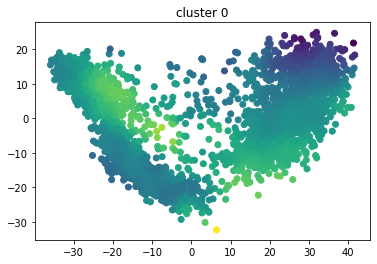

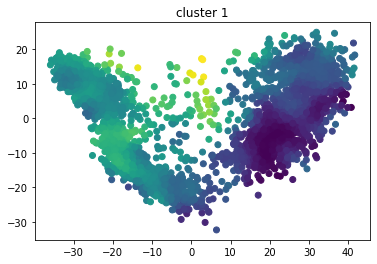

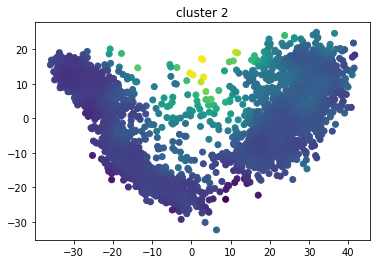

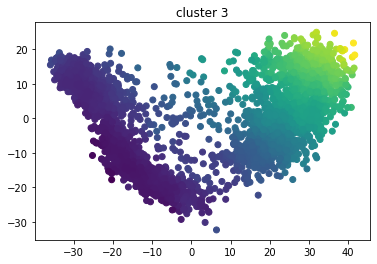

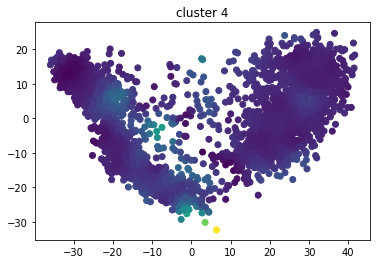

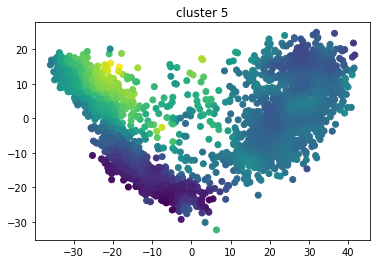

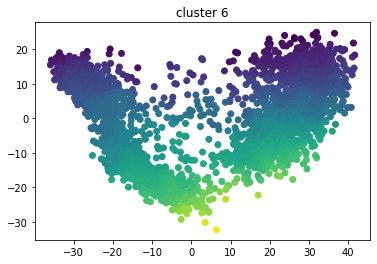

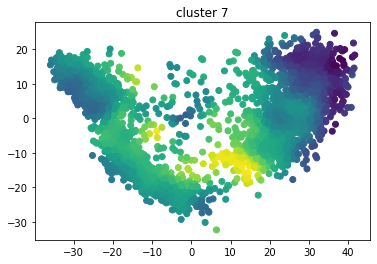

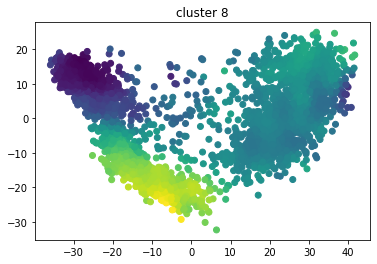

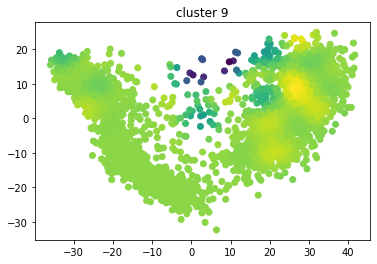

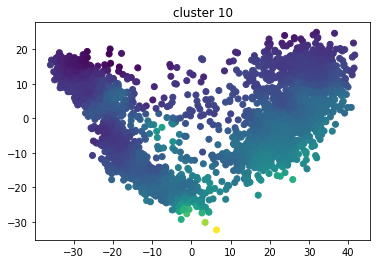

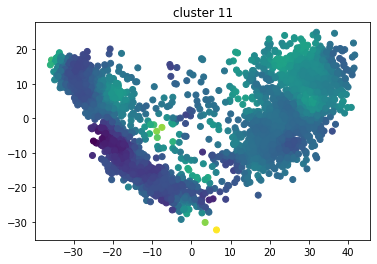

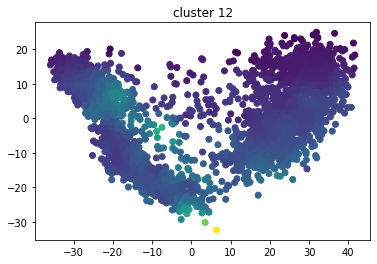

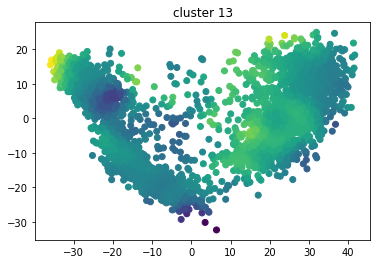

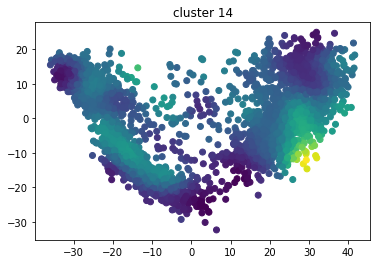

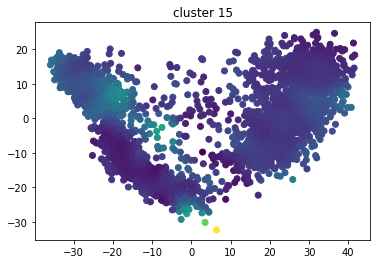

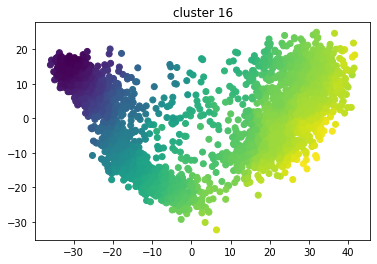

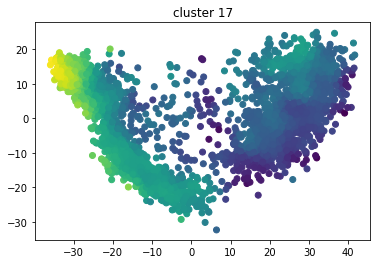

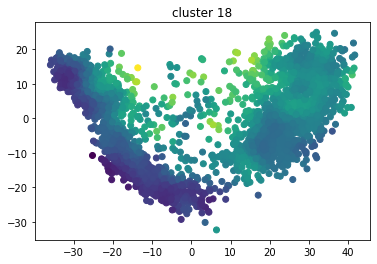

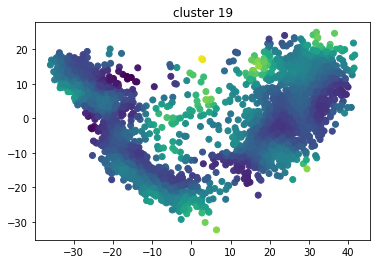

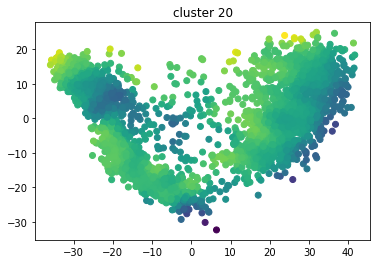

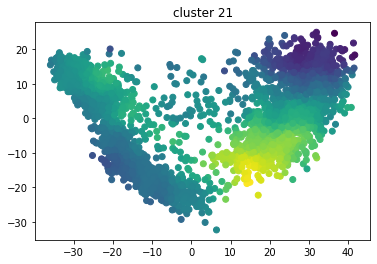

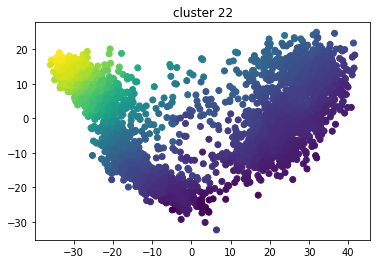

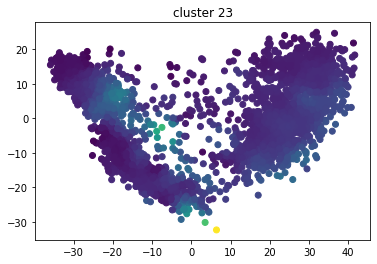

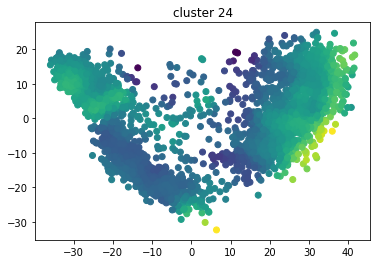

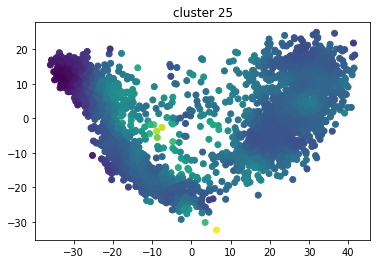

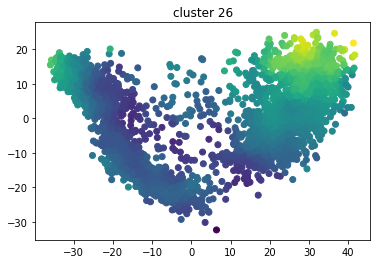

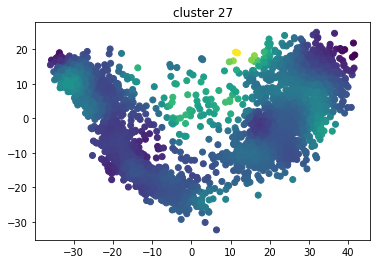

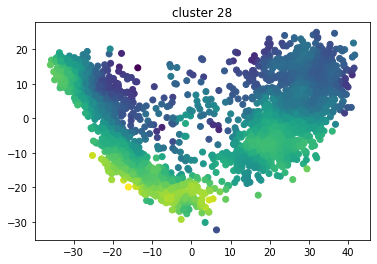

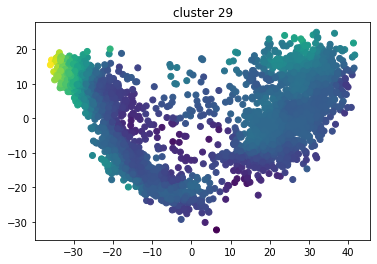

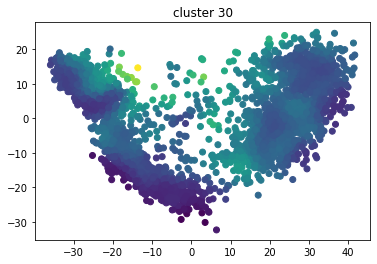

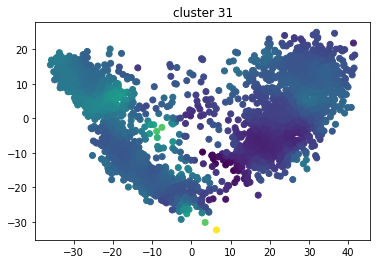

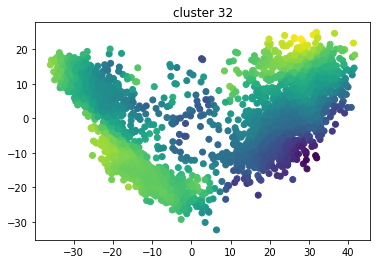

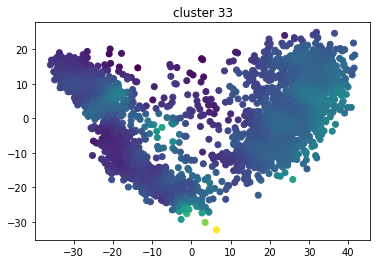

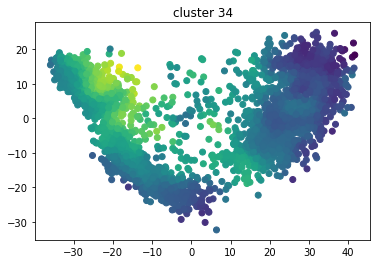

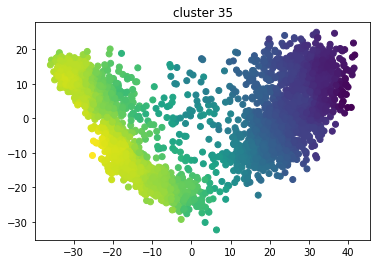

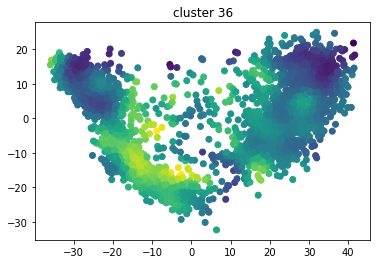

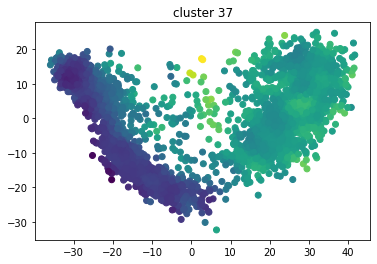

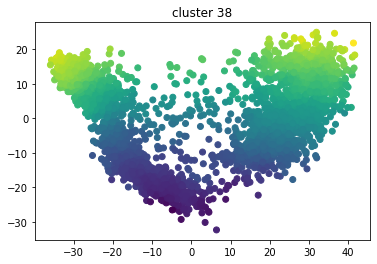

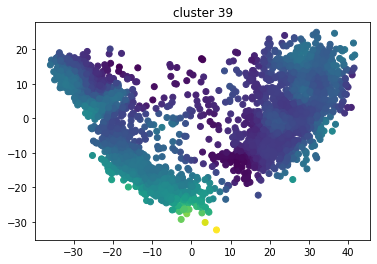

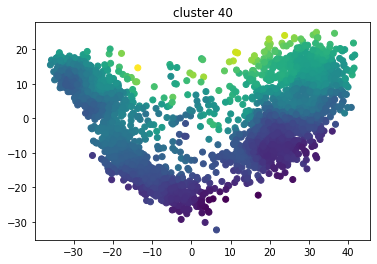

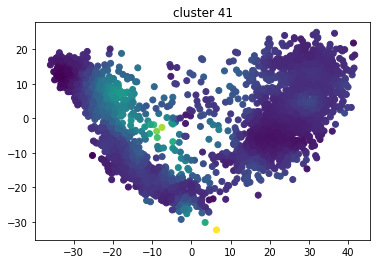

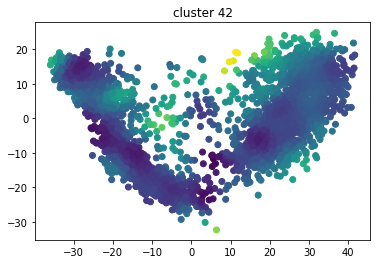

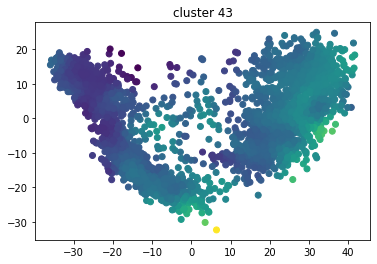

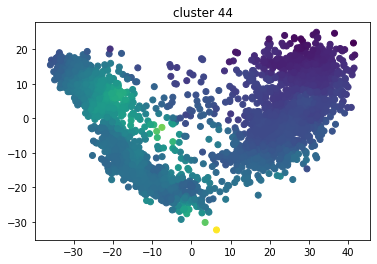

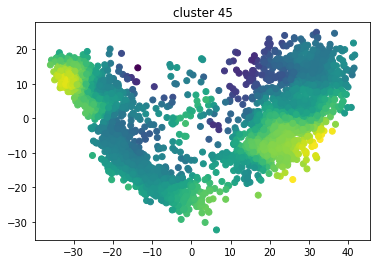

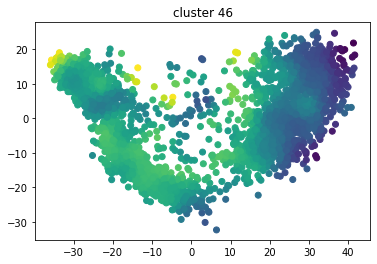

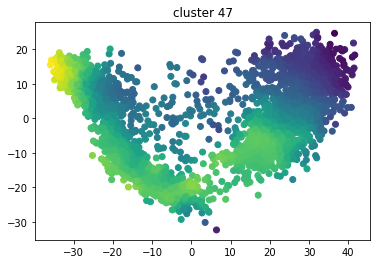

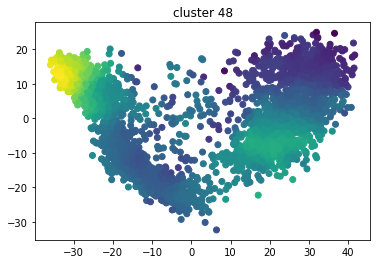

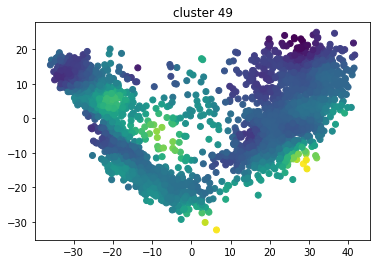

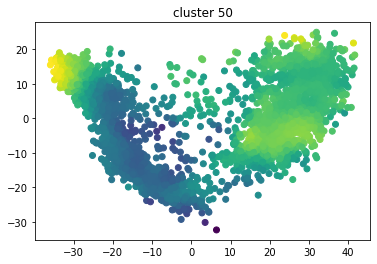

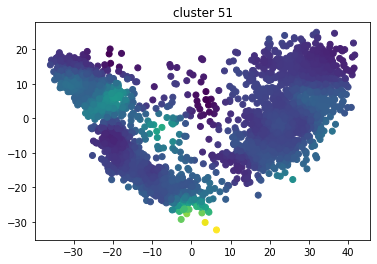

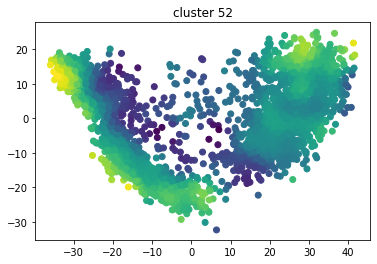

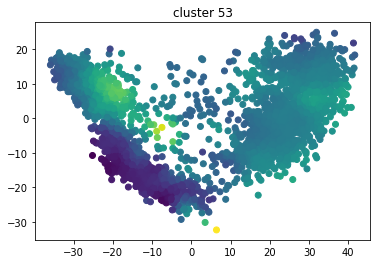

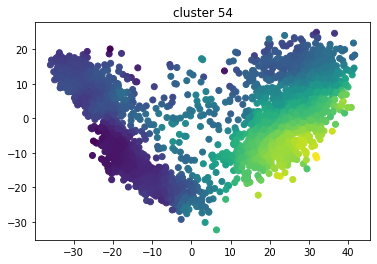

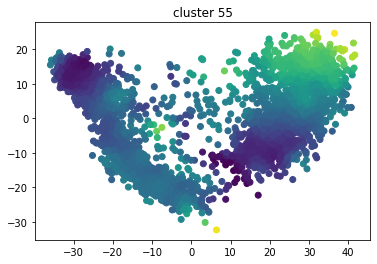

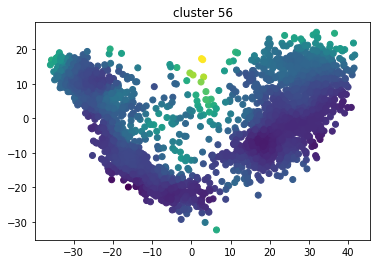

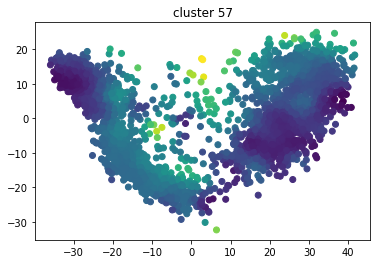

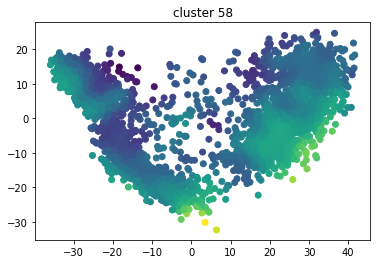

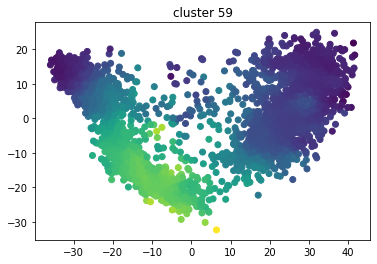

In [210]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i))
    plt.show()